In [1]:
# Necessery libraries
import pandas as pd
from src.utils import general_look_at_data as  GLAD

In [2]:
# set option setting to display all columns
pd.set_option('display.max_columns', None)

In [3]:
# Reading data as dataframe
data = pd.read_csv('../data/raw/Citywide_Survey.csv')

In [4]:
# Display some of data
data.head(10)

,hh_id,weight,cms_zone,survey_mode,person_id,person_num,is_participant,num_days,num_days_complete,num_trips,num_walk_trips,num_transit_trips,num_bike_trips,num_taxi_trips,num_tnc_trips,num_complete_weekend_days,num_complete_weekdays,first_travel_date,last_travel_date,made_trips,smartphone_type,relationship,age,employment,worker,student,license,vehicle,congestion,drive_cbd_freq,planning_apps,job_type,jobs_count,industry,telework_freq,work_cms_zone,missing_work_location,work_mode,work_mode_own,work_park_location,work_park_pay,work_vehicle_pass_period,work_park_amount_day,work_park_amount_week,work_park_amount_month,work_park_amount_year,work_mode_auto,work_mode_bus,work_mode_rail,work_mode_ferry,work_mode_taxi,work_mode_bike,work_bike_park,work_mode_scooter,work_scooter_park,school_type,school_cms_zone,missing_school_location,kid_accompany,school_mode,school_mode_own,school_park_location,school_vehicle_pass_period,school_park_amount_day,school_park_amount_month,school_park_amount_week,school_park_amount_year,school_mode_auto,school_mode_bus,school_mode_rail,school_mode_ferry,school_access,school_egress,school_mode_taxi,school_mode_bike,school_bike_park,school_mode_scooter,school_scooter_park,bike_freq,bike_num_days,bike_stolen,bike_purpose_errands,bike_purpose_transit,bike_purpose_recreation,bike_purpose_commute,bike_purpose_appointment,bike_purpose_other,no_bike_nyc_bike_lanes,no_bike_nyc_paving,no_bike_nyc_storage,no_bike_nyc_long_trips,no_bike_nyc_showers,no_bike_nyc_modes,no_bike_nyc_unable,no_bike_nyc_other,bike_share_citi_bike,bike_share_jump,bike_share_lime,bike_share_none,bike_share_user,citi_bike_freq,jump_freq,lime_freq,no_bike_share_unfamiliar,no_bike_share_expensive,no_bike_share_neighborhood,no_bike_share_stations,no_bike_share_personal_bike,no_bike_share_docks,no_bike_share_uncomfortable,no_bike_share_other,tnc_use_uber,tnc_use_lyft,tnc_use_via,tnc_use_juno,tnc_use_none,tnc_user,tnc_freq,tnc_purpose,tnc_mode,tnc_mode_auto,tnc_mode_taxi,tnc_mode_bus,tnc_mode_rail,tnc_mode_ferry,tnc_mode_bike,tnc_mode_scooter,car_share_zipcar,car_share_car2go,car_share_enterprise,car_share_other,car_share_none,car_share_user,packages,packages_distance,harassment,harassment_trip,harassment_time,harassment_route,harassment_transit,harassment_mode,harassment_neighborhood,harassment_private_car,harassment_alone,harassment_attention,harassment_defense,harassment_other,harassment_none,gender,education,english_proficiency,ethnicity,race_american_indian,race_asian,race_black,race_native_hawaiian,race_white,race_other,disability_hearing,disability_seeing,disability_walking,disability_mobility,disability_dressing,disability_concentrating,disability_none
0,191546322,0.00000,Inner Brooklyn,1,19154632203,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,06/24/2019,06/30/2019,NaN,995,5,9,3,1,0,995,995,995,995,995,995,995,995,995,NaN,0,995,995,995,995,995,NaN,NaN,NaN,NaN,995,995,995,995,995,995,995,995,995,995,NaN,0,995,995,995,995,995,NaN,NaN,NaN,NaN,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995
1,191546322,0.00000,Inner Brooklyn,1,19154632202,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,06/24/2019,06/30/2019,NaN,995,5,8,6,0,0,995,995,995,995,995,995,995,995,995,NaN,0,995,995,995,995,995,NaN,NaN,NaN,NaN,995,995,995,995,995,995,995,995,995,995,NaN,0,995,995,995,995,995,NaN,NaN,NaN,NaN,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,995,9

In [5]:
# Display the shape of the data
data.shape

(8286, 165)

The data is strange in that not all of the rows are filled...

At the same time, even though it is an ID, the column hh id is a frequent value, and after searching for the meaning of the column with the description file,
 we discovered that it means the household number, and since the entire family participating in the trip was registered, but only one person fills out the data, 
 **we will delete all data that is not related to the person who filled out the survey**...

# Update Row's Shape

In [6]:
# Keep track of everyone who took part in the survey
data.drop(data[data.is_participant == 0].index, inplace=True)

# Re-index the data after deleting some rows
data.reset_index(drop=True, inplace=True)

In [7]:
# Display some of data after updated
data.head(10)

,hh_id,weight,cms_zone,survey_mode,person_id,person_num,is_participant,num_days,num_days_complete,num_trips,num_walk_trips,num_transit_trips,num_bike_trips,num_taxi_trips,num_tnc_trips,num_complete_weekend_days,num_complete_weekdays,first_travel_date,last_travel_date,made_trips,smartphone_type,relationship,age,employment,worker,student,license,vehicle,congestion,drive_cbd_freq,planning_apps,job_type,jobs_count,industry,telework_freq,work_cms_zone,missing_work_location,work_mode,work_mode_own,work_park_location,work_park_pay,work_vehicle_pass_period,work_park_amount_day,work_park_amount_week,work_park_amount_month,work_park_amount_year,work_mode_auto,work_mode_bus,work_mode_rail,work_mode_ferry,work_mode_taxi,work_mode_bike,work_bike_park,work_mode_scooter,work_scooter_park,school_type,school_cms_zone,missing_school_location,kid_accompany,school_mode,school_mode_own,school_park_location,school_vehicle_pass_period,school_park_amount_day,school_park_amount_month,school_park_amount_week,school_park_amount_year,school_mode_auto,school_mode_bus,school_mode_rail,school_mode_ferry,school_access,school_egress,school_mode_taxi,school_mode_bike,school_bike_park,school_mode_scooter,school_scooter_park,bike_freq,bike_num_days,bike_stolen,bike_purpose_errands,bike_purpose_transit,bike_purpose_recreation,bike_purpose_commute,bike_purpose_appointment,bike_purpose_other,no_bike_nyc_bike_lanes,no_bike_nyc_paving,no_bike_nyc_storage,no_bike_nyc_long_trips,no_bike_nyc_showers,no_bike_nyc_modes,no_bike_nyc_unable,no_bike_nyc_other,bike_share_citi_bike,bike_share_jump,bike_share_lime,bike_share_none,bike_share_user,citi_bike_freq,jump_freq,lime_freq,no_bike_share_unfamiliar,no_bike_share_expensive,no_bike_share_neighborhood,no_bike_share_stations,no_bike_share_personal_bike,no_bike_share_docks,no_bike_share_uncomfortable,no_bike_share_other,tnc_use_uber,tnc_use_lyft,tnc_use_via,tnc_use_juno,tnc_use_none,tnc_user,tnc_freq,tnc_purpose,tnc_mode,tnc_mode_auto,tnc_mode_taxi,tnc_mode_bus,tnc_mode_rail,tnc_mode_ferry,tnc_mode_bike,tnc_mode_scooter,car_share_zipcar,car_share_car2go,car_share_enterprise,car_share_other,car_share_none,car_share_user,packages,packages_distance,harassment,harassment_trip,harassment_time,harassment_route,harassment_transit,harassment_mode,harassment_neighborhood,harassment_private_car,harassment_alone,harassment_attention,harassment_defense,harassment_other,harassment_none,gender,education,english_proficiency,ethnicity,race_american_indian,race_asian,race_black,race_native_hawaiian,race_white,race_other,disability_hearing,disability_seeing,disability_walking,disability_mobility,disability_dressing,disability_concentrating,disability_none
0,191546322,212.12729,Inner Brooklyn,1,19154632201,1,1,7.0,7.0,23.0,1.0,3.0,11.0,0.0,0.0,2.0,5.0,06/24/2019,06/30/2019,1.0,1,0,5,6,0,1,1,1,4,7,1,995,995,995,995,NaN,0,995,995,995,995,995,NaN,NaN,NaN,NaN,995,995,995,995,995,995,995,995,995,10,NaN,1,995,100,6,4,5,NaN,NaN,NaN,NaN,995,995,995,995,995,995,995,995,995,995,995,2,2,0,1,0,1,0,0,0,995,995,995,995,995,995,995,995,0,0,0,1,0,995,995,995,0,0,0,0,1,0,0,0,0,0,0,0,1,0,995,995,995,995,995,995,995,995,995,995,0,0,0,0,1,0,4,2,4,995,995,995,995,995,995,995,995,995,995,995,995,1,5,1,997,0,0,0,1,0,0,0,0,0,0,0,0,1
1,19241657,1262.69496,Middle Queens,1,1924165701,1,1,7.0,7.0,15.0,2.0,1.0,0.0,0.0,0.0,2.0,5.0,05/29/2019,06/04/2019,1.0,2,0,5,2,1,2,0,1,4,8,3,1,1,8,8,NaN,0,100,6,6,995,995,NaN,NaN,NaN,NaN,995,995,995,995,995,995,995,995,995,9,NaN,1,995,102,995,995,995,NaN,NaN,NaN,NaN,995,23,995,995,995,995,995,995,995,995,995,5,0,0,995,995,995,995,995,995,0,0,0,0,0,1,0,0,0,0,0,1,0,995,995,995,0,0,0,0,0,0,0,1,1,1,0,0,0,1,7,1,105,995,995,995,30,995,995,995,0,0,0,0,1,0,1,995,4,995,995,995,995,995,995,995,995,995,995,995,995,2,6,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1
2,19933569,92.92534,Middle Queens,1,1993356901,1,1,7.0,7.0,30.0,22.0,9.0,0.0,0.0,0.0,2.0,5.0,06/06/2019,06/12/2019,1.0,2,0,7,7,1,0,0,995,2,995,3,1,1,15,8,NaN,1,105,995,995,995,995,NaN,NaN,NaN,NaN,995,995,30,

In [8]:
# Display the shape of the data after updated
data.shape

(3346, 165)

So far, 3,346 individuals have responded to the survey.

# Update Columns Shape

In [9]:
# This is a list of features that we decided to delete after the discussion.
drop_features = ['person_id', 'num_days', 'relationship', 
                 'num_days_complete', 'person_num', 'hh_id', 
                 'survey_mode', 'weight', 'is_participant']

In [10]:
# Delete the features list
data.drop(drop_features, axis=1, inplace=True)

In [11]:
# Display some of data after updated
data.head(10)

,cms_zone,num_trips,num_walk_trips,num_transit_trips,num_bike_trips,num_taxi_trips,num_tnc_trips,num_complete_weekend_days,num_complete_weekdays,first_travel_date,last_travel_date,made_trips,smartphone_type,age,employment,worker,student,license,vehicle,congestion,drive_cbd_freq,planning_apps,job_type,jobs_count,industry,telework_freq,work_cms_zone,missing_work_location,work_mode,work_mode_own,work_park_location,work_park_pay,work_vehicle_pass_period,work_park_amount_day,work_park_amount_week,work_park_amount_month,work_park_amount_year,work_mode_auto,work_mode_bus,work_mode_rail,work_mode_ferry,work_mode_taxi,work_mode_bike,work_bike_park,work_mode_scooter,work_scooter_park,school_type,school_cms_zone,missing_school_location,kid_accompany,school_mode,school_mode_own,school_park_location,school_vehicle_pass_period,school_park_amount_day,school_park_amount_month,school_park_amount_week,school_park_amount_year,school_mode_auto,school_mode_bus,school_mode_rail,school_mode_ferry,school_access,school_egress,school_mode_taxi,school_mode_bike,school_bike_park,school_mode_scooter,school_scooter_park,bike_freq,bike_num_days,bike_stolen,bike_purpose_errands,bike_purpose_transit,bike_purpose_recreation,bike_purpose_commute,bike_purpose_appointment,bike_purpose_other,no_bike_nyc_bike_lanes,no_bike_nyc_paving,no_bike_nyc_storage,no_bike_nyc_long_trips,no_bike_nyc_showers,no_bike_nyc_modes,no_bike_nyc_unable,no_bike_nyc_other,bike_share_citi_bike,bike_share_jump,bike_share_lime,bike_share_none,bike_share_user,citi_bike_freq,jump_freq,lime_freq,no_bike_share_unfamiliar,no_bike_share_expensive,no_bike_share_neighborhood,no_bike_share_stations,no_bike_share_personal_bike,no_bike_share_docks,no_bike_share_uncomfortable,no_bike_share_other,tnc_use_uber,tnc_use_lyft,tnc_use_via,tnc_use_juno,tnc_use_none,tnc_user,tnc_freq,tnc_purpose,tnc_mode,tnc_mode_auto,tnc_mode_taxi,tnc_mode_bus,tnc_mode_rail,tnc_mode_ferry,tnc_mode_bike,tnc_mode_scooter,car_share_zipcar,car_share_car2go,car_share_enterprise,car_share_other,car_share_none,car_share_user,packages,packages_distance,harassment,harassment_trip,harassment_time,harassment_route,harassment_transit,harassment_mode,harassment_neighborhood,harassment_private_car,harassment_alone,harassment_attention,harassment_defense,harassment_other,harassment_none,gender,education,english_proficiency,ethnicity,race_american_indian,race_asian,race_black,race_native_hawaiian,race_white,race_other,disability_hearing,disability_seeing,disability_walking,disability_mobility,disability_dressing,disability_concentrating,disability_none
0,Inner Brooklyn,23.0,1.0,3.0,11.0,0.0,0.0,2.0,5.0,06/24/2019,06/30/2019,1.0,1,5,6,0,1,1,1,4,7,1,995,995,995,995,NaN,0,995,995,995,995,995,NaN,NaN,NaN,NaN,995,995,995,995,995,995,995,995,995,10,NaN,1,995,100,6,4,5,NaN,NaN,NaN,NaN,995,995,995,995,995,995,995,995,995,995,995,2,2,0,1,0,1,0,0,0,995,995,995,995,995,995,995,995,0,0,0,1,0,995,995,995,0,0,0,0,1,0,0,0,0,0,0,0,1,0,995,995,995,995,995,995,995,995,995,995,0,0,0,0,1,0,4,2,4,995,995,995,995,995,995,995,995,995,995,995,995,1,5,1,997,0,0,0,1,0,0,0,0,0,0,0,0,1
1,Middle Queens,15.0,2.0,1.0,0.0,0.0,0.0,2.0,5.0,05/29/2019,06/04/2019,1.0,2,5,2,1,2,0,1,4,8,3,1,1,8,8,NaN,0,100,6,6,995,995,NaN,NaN,NaN,NaN,995,995,995,995,995,995,995,995,995,9,NaN,1,995,102,995,995,995,NaN,NaN,NaN,NaN,995,23,995,995,995,995,995,995,995,995,995,5,0,0,995,995,995,995,995,995,0,0,0,0,0,1,0,0,0,0,0,1,0,995,995,995,0,0,0,0,0,0,0,1,1,1,0,0,0,1,7,1,105,995,995,995,30,995,995,995,0,0,0,0,1,0,1,995,4,995,995,995,995,995,995,995,995,995,995,995,995,2,6,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1
2,Middle Queens,30.0,22.0,9.0,0.0,0.0,0.0,2.0,5.0,06/06/2019,06/12/2019,1.0,2,7,7,1,0,0,995,2,995,3,1,1,15,8,NaN,1,105,995,995,995,995,NaN,NaN,NaN,NaN,995,995,30,995,995,995,995,995,995,995,NaN,0,995,995,995,995,995,NaN,NaN,NaN,NaN,995,995,995,995,995,995,995,995,995,995,995,5,0,0,995,995,995,995,995,995,1,0,0,0,0,0,0,0,0,0,0,1,0,995,995,995,0,0,1,0,0,0,0,0,0,0,0,0,1,0,995,995,995,995,995,995,995,995

In [12]:
# Display the shape of the data after updated
data.shape

(3346, 156)

# Types of the Data

In [13]:
# check features data types 
data.dtypes.unique()

array([dtype('O'), dtype('float64'), dtype('int64')], dtype=object)

# Explore Categorical vs. Numerical Datasets

In [14]:
# get numeric and categorical features names 
numeric_features = data.select_dtypes(include=['float64', 'int64'])
categorical_features = data.select_dtypes(include='O')

## Statistical Information from Numerical Dataset

In [15]:
# Display 5 random samples of numeric dataset
numeric_features.sample(5)

,num_trips,num_walk_trips,num_transit_trips,num_bike_trips,num_taxi_trips,num_tnc_trips,num_complete_weekend_days,num_complete_weekdays,made_trips,smartphone_type,age,employment,worker,student,license,vehicle,congestion,drive_cbd_freq,planning_apps,job_type,jobs_count,industry,telework_freq,missing_work_location,work_mode,work_mode_own,work_park_location,work_park_pay,work_vehicle_pass_period,work_park_amount_day,work_park_amount_week,work_park_amount_month,work_park_amount_year,work_mode_auto,work_mode_bus,work_mode_rail,work_mode_ferry,work_mode_taxi,work_mode_bike,work_bike_park,work_mode_scooter,work_scooter_park,school_type,missing_school_location,kid_accompany,school_mode,school_mode_own,school_park_location,school_vehicle_pass_period,school_park_amount_day,school_park_amount_month,school_park_amount_week,school_park_amount_year,school_mode_auto,school_mode_bus,school_mode_rail,school_mode_ferry,school_access,school_egress,school_mode_taxi,school_mode_bike,school_bike_park,school_mode_scooter,school_scooter_park,bike_freq,bike_num_days,bike_stolen,bike_purpose_errands,bike_purpose_transit,bike_purpose_recreation,bike_purpose_commute,bike_purpose_appointment,bike_purpose_other,no_bike_nyc_bike_lanes,no_bike_nyc_paving,no_bike_nyc_storage,no_bike_nyc_long_trips,no_bike_nyc_showers,no_bike_nyc_modes,no_bike_nyc_unable,no_bike_nyc_other,bike_share_citi_bike,bike_share_jump,bike_share_lime,bike_share_none,bike_share_user,citi_bike_freq,jump_freq,lime_freq,no_bike_share_unfamiliar,no_bike_share_expensive,no_bike_share_neighborhood,no_bike_share_stations,no_bike_share_personal_bike,no_bike_share_docks,no_bike_share_uncomfortable,no_bike_share_other,tnc_use_uber,tnc_use_lyft,tnc_use_via,tnc_use_juno,tnc_use_none,tnc_user,tnc_freq,tnc_purpose,tnc_mode,tnc_mode_auto,tnc_mode_taxi,tnc_mode_bus,tnc_mode_rail,tnc_mode_ferry,tnc_mode_bike,tnc_mode_scooter,car_share_zipcar,car_share_car2go,car_share_enterprise,car_share_other,car_share_none,car_share_user,packages,packages_distance,harassment,harassment_trip,harassment_time,harassment_route,harassment_transit,harassment_mode,harassment_neighborhood,harassment_private_car,harassment_alone,harassment_attention,harassment_defense,harassment_other,harassment_none,gender,education,english_proficiency,ethnicity,race_american_indian,race_asian,race_black,race_native_hawaiian,race_white,race_other,disability_hearing,disability_seeing,disability_walking,disability_mobility,disability_dressing,disability_concentrating,disability_none
819,44.0,29.0,5.0,10.0,0.0,0.0,2.0,5.0,1.0,2,8,3,1,0,1,995,1,995,5,3,1,17,995,0,995,995,995,995,995,NaN,NaN,NaN,NaN,995,995,995,995,995,995,995,995,995,995,0,995,995,995,995,995,NaN,NaN,NaN,NaN,995,995,995,995,995,995,995,995,995,995,995,1,3,0,1,0,1,1,1,0,995,995,995,995,995,995,995,995,0,0,0,1,0,995,995,995,0,0,0,0,1,0,0,0,0,0,0,0,1,0,995,995,995,995,995,995,995,995,995,995,0,0,0,0,1,0,1,995,4,995,995,995,995,995,995,995,995,995,995,995,995,1,6,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1
2494,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,6,2,1,0,-9998,995,-9998,-9998,-9998,2,3,10,2,0,100,6,3,1,995,NaN,NaN,NaN,NaN,995,995,995,995,995,995,995,995,995,995,0,995,995,995,995,995,NaN,NaN,NaN,NaN,995,995,995,995,995,995,995,995,995,995,995,-9998,995,-9998,-9998,-9998,-9998,-9998,-9998,-9998,995,995,995,995,995,995,995,995,-9998,-9998,-9998,-9998,-9998,995,995,995,-9998,-9998,-9998,-9998,-9998,-9998,-9998,-9998,-9998,-9998,-9998,-9998,-9998,-9998,995,995,995,995,995,995,995,995,995,995,-9998,-9998,-9998,-9998,-9998,-9998,-9998,995,-9998,-9998,-9998,-9998,-9998,-9998,-9998,-9998,-9998,-9998,-9998,-9998,-9998,999,-9998,-9998,1,0,0,0,0,1,0,0,0,0,0,0,0,1
2994,2.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0,8,1,1,0,0,995,4,995,6,1,1,7,8,0,102,995,995,995,995,NaN,NaN,NaN,NaN,995,23,995,995,995,995,995,995,995,995,0,995,995,995,995,995,NaN,NaN,NaN,NaN,995,995,995,995,995,995,995,995,995,995,995,5,995,0,995,995,995,995,995,995,0,0,0,0,0,0,0,1,0,0,0,1,0,995,995,995,0,0,0,0,0,0,1,0,0,0,0,0,1,0,995,995,995,995,995,

In [16]:
# Display the columns number of numeric dataset
numeric_features.shape[1]

151

In [17]:
# Display Statistics of numeric data
numeric_features.describe()

,num_trips,num_walk_trips,num_transit_trips,num_bike_trips,num_taxi_trips,num_tnc_trips,num_complete_weekend_days,num_complete_weekdays,made_trips,smartphone_type,age,employment,worker,student,license,vehicle,congestion,drive_cbd_freq,planning_apps,job_type,jobs_count,industry,telework_freq,missing_work_location,work_mode,work_mode_own,work_park_location,work_park_pay,work_vehicle_pass_period,work_park_amount_day,work_park_amount_week,work_park_amount_month,work_park_amount_year,work_mode_auto,work_mode_bus,work_mode_rail,work_mode_ferry,work_mode_taxi,work_mode_bike,work_bike_park,work_mode_scooter,work_scooter_park,school_type,missing_school_location,kid_accompany,school_mode,school_mode_own,school_park_location,school_vehicle_pass_period,school_park_amount_day,school_park_amount_month,school_park_amount_week,school_park_amount_year,school_mode_auto,school_mode_bus,school_mode_rail,school_mode_ferry,school_access,school_egress,school_mode_taxi,school_mode_bike,school_bike_park,school_mode_scooter,school_scooter_park,bike_freq,bike_num_days,bike_stolen,bike_purpose_errands,bike_purpose_transit,bike_purpose_recreation,bike_purpose_commute,bike_purpose_appointment,bike_purpose_other,no_bike_nyc_bike_lanes,no_bike_nyc_paving,no_bike_nyc_storage,no_bike_nyc_long_trips,no_bike_nyc_showers,no_bike_nyc_modes,no_bike_nyc_unable,no_bike_nyc_other,bike_share_citi_bike,bike_share_jump,bike_share_lime,bike_share_none,bike_share_user,citi_bike_freq,jump_freq,lime_freq,no_bike_share_unfamiliar,no_bike_share_expensive,no_bike_share_neighborhood,no_bike_share_stations,no_bike_share_personal_bike,no_bike_share_docks,no_bike_share_uncomfortable,no_bike_share_other,tnc_use_uber,tnc_use_lyft,tnc_use_via,tnc_use_juno,tnc_use_none,tnc_user,tnc_freq,tnc_purpose,tnc_mode,tnc_mode_auto,tnc_mode_taxi,tnc_mode_bus,tnc_mode_rail,tnc_mode_ferry,tnc_mode_bike,tnc_mode_scooter,car_share_zipcar,car_share_car2go,car_share_enterprise,car_share_other,car_share_none,car_share_user,packages,packages_distance,harassment,harassment_trip,harassment_time,harassment_route,harassment_transit,harassment_mode,harassment_neighborhood,harassment_private_car,harassment_alone,harassment_attention,harassment_defense,harassment_other,harassment_none,gender,education,english_proficiency,ethnicity,race_american_indian,race_asian,race_black,race_native_hawaiian,race_white,race_other,disability_hearing,disability_seeing,disability_walking,disability_mobility,disability_dressing,disability_concentrating,disability_none
count,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,24.000000,12.000000,22.000000,4.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.0,3346.0,3346.000000,3346.000000,3346.0,3346.000000,3346.000000,3346.000000,3346.000000,6.000000,7.000000,4.000000,7.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.0,3346.0,3346.000000,3346.000000,3346.000000,3346.0,3346.0,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346

### Conclusions Based on the Statistics Presented
* Almost all numerical data is one hot including.
* Missing data values/labels such as -9998 and 995 have an impact on statistics.
* Because work park amount_ and school park amount_ are rare data, their distribution is skewed.

## Statistical Information from Categorical Dataset

In [18]:
# Display 5 samples of categorical dataset
categorical_features.sample(5)

,cms_zone,first_travel_date,last_travel_date,work_cms_zone,school_cms_zone
374,Northern Manhattan,05/28/2019,06/03/2019,Manhattan Core,NaN
3026,Manhattan Core,06/03/2019,06/03/2019,Manhattan Core,NaN
3264,Manhattan Core,06/05/2019,06/05/2019,Outer Brooklyn,NaN
1739,Southern Bronx,06/08/2019,06/14/2019,NaN,NaN
1673,Outer Queens,06/04/2019,06/10/2019,Middle Queens,NaN


In [19]:
# Display 5 samples of categorical dataset
categorical_features.shape[1]

5

In [20]:
# Display Statistics of categorical data
categorical_features.describe()

,cms_zone,first_travel_date,last_travel_date,work_cms_zone,school_cms_zone
count,3346,3346,3346,1687,122
unique,10,39,40,12,10
top,Northern Bronx,06/07/2019,06/13/2019,Manhattan Core,Manhattan Core
freq,416,268,279,815,35


### Conclusions based on the statistics presented
* The 'work_cms_zone' feature contain nearly 50% missing data.
* Because 'scool_cms_zone' feature are rare data, its distribution is skewed.

## Summary of Exploring the two Datasets
- There are 151 numeric features but some of them are a kind of labels for the data such as tnc_mode, pakages, etc. 
- There are 5 categorical feature 2 of them are of type time series. 
- The above mentioned wrong data types will be handled during the feature engineering process. 

# Explore Missing Data Information

In [21]:
# Display percentages about types of missing data in the features
feature_missing_stats = GLAD.get_feature_missing(data)
feature_missing_stats

,missing_count,missing_percentage,dont_know_percentage,no_response_percentage,technological_error_percentage,prefer_not_to_answer_percentage,not_required_percentage,feature_type
feature,,,,,,,,
school_park_amount_week,3342,0.998805,0.0,0.0,0.0,0.000000,0.000000,float64
work_park_amount_year,3342,0.998805,0.0,0.0,0.0,0.000000,0.000000,float64
school_park_amount_day,3340,0.998207,0.0,0.0,0.0,0.000000,0.000000,float64
school_park_amount_month,3339,0.997908,0.0,0.0,0.0,0.000000,0.000000,float64
school_park_amount_year,3339,0.997908,0.0,0.0,0.0,0.000000,0.000000,float64
...,...,...,...,...,...,...,...,...
school_bike_park,0,0.000000,0.0,0.0,0.0,0.000000,0.997908,int64
school_mode_bike,0,0.000000,0.0,0.0,0.0,0.000000,0.997908,int64
school_mode_taxi,0,0.000000,0.0,0.0,0.0,0.000000,0.998207,int64


## Direct Missing Data

In [22]:
# Display percentages about direct missing data in the features
direct_missing = GLAD.display_direct_missing(feature_missing_stats)
direct_missing

,missing_count,missing_percentage
feature,,
school_park_amount_week,3342,0.998805
work_park_amount_year,3342,0.998805
school_park_amount_day,3340,0.998207
school_park_amount_month,3339,0.997908
school_park_amount_year,3339,0.997908
work_park_amount_week,3334,0.996414
work_park_amount_month,3324,0.993425
work_park_amount_day,3322,0.992827
school_cms_zone,3224,0.963539


## Suggestion to Handle Missing Data of Direct Missing Columns
1. Based on the previous statistics, I recommend that **features with a missing percentage greater than 0.75 be removed.**.

2. Recommend that the missing data for the **'work_cms_zone' feature be filled by the KNN algorithm**. *[for this iteration use Mode value instead]*

## Indirect Missing Data

In [23]:
# Display percentages about types of missing data in the features
indirect_missing = GLAD.display_indirect_missing(feature_missing_stats)
indirect_missing

,dont_know_percentage,no_response_percentage,prefer_not_to_answer_percentage,not_required_percentage
feature,,,,
school_park_amount_week,0.0,0.0,0.000000,0.000000
work_park_amount_year,0.0,0.0,0.000000,0.000000
school_park_amount_day,0.0,0.0,0.000000,0.000000
school_park_amount_month,0.0,0.0,0.000000,0.000000
school_park_amount_year,0.0,0.0,0.000000,0.000000
...,...,...,...,...
school_bike_park,0.0,0.0,0.000000,0.997908
school_mode_bike,0.0,0.0,0.000000,0.997908
school_mode_taxi,0.0,0.0,0.000000,0.998207


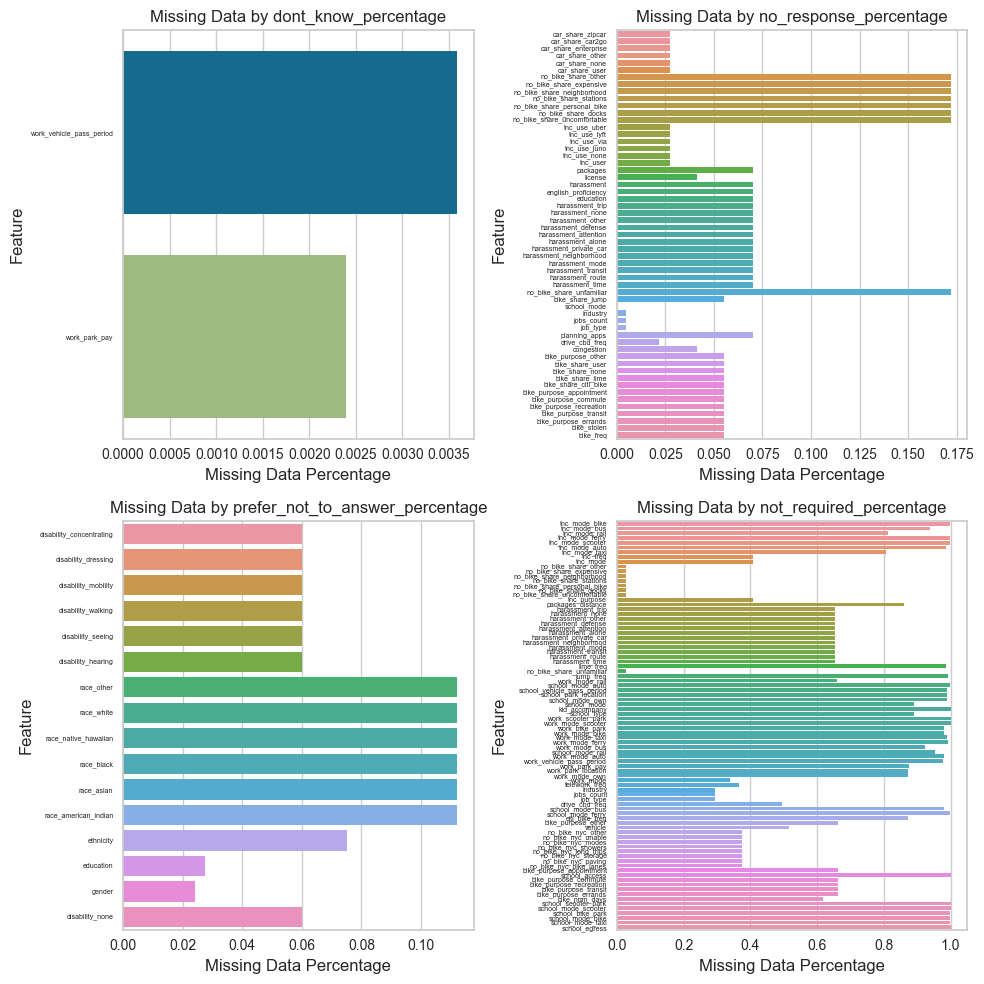

In [24]:
# Make it more readable by displaying it as a plot
GLAD.plot_indirect_missing(indirect_missing)

## Suggestion to Handle Missing Data of Indirect Missing Columns
- **Remove columns that have more than 75% missing data.**
- **Fill in** the missing values **for the one hot encoding column** in natural structure by zero value.
- Otherwise, **fill in** the missing data **with the column's mode or mean value**.